# 6장 : 데이터 시각화

# Matplotlib 버전 및 모듈

In [1]:
import pkgutil as pu
import numpy as np
import matplotlib as mpl
import scipy as sp
import pandas as pd
import pydoc

print("Matplotlib version", mpl.__version__)

def clean(astr):
   s = astr
   # 필요없는 공백 제거
   s = ' '.join(s.split())
   s = s.replace('=','')

   return s

def print_desc(prefix, pkg_path):
   for pkg in pu.iter_modules(path=pkg_path):
      name = prefix + "." + pkg[1]

      if pkg[2] == True:
         try:
            docstr = pydoc.plain(pydoc.render_doc(name))
            docstr = clean(docstr)
            start = docstr.find("DESCRIPTION")
            docstr = docstr[start: start + 140]
            print(name, docstr)
         except:
            continue

print("\n")
print_desc("matplotlib", mpl.__path__)

Matplotlib version 3.1.1


matplotlib.axes 
matplotlib.backends 
matplotlib.cbook DESCRIPTION A collection of utility functions and classes. Originally, many (but not all) were from the Python Cookbook -- hence the name cb
matplotlib.compat 
matplotlib.projections 
matplotlib.sphinxext 
matplotlib.style 
matplotlib.testing 
matplotlib.tri 


C:\ProgramData\Anaconda3\lib\pydoc.py:1053: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return cram(stripid(repr(x)), self.maxother)


# 기본적인 matplotlib 플롯

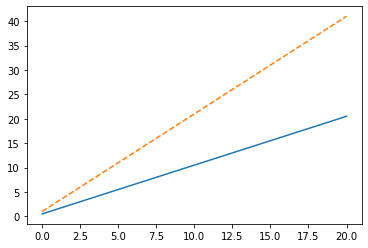

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 20)

plt.plot(x,  .5 + x)
plt.plot(x, 1 + 2 * x, '--')
plt.show()

# 로그 플롯

Poly [ 3.61559210e-01 -7.05783195e+02]


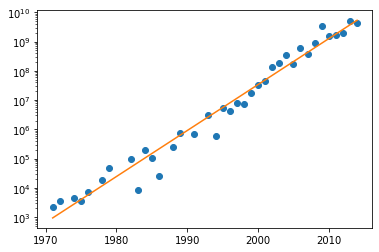

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)
years = df.index.values
counts = df['trans_count'].values
poly = np.polyfit(years, np.log(counts), deg=1)
print("Poly", poly)
plt.semilogy(years, counts, 'o')
plt.semilogy(years, np.exp(np.polyval(poly, years)))
plt.show()

## 분산 플롯

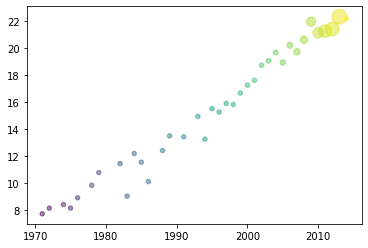

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)
years = df.index.values
counts = df['trans_count'].values
gpu_counts = df['gpu_trans_count'].values
cnt_log = np.log(counts)
plt.scatter(years, cnt_log, c= 200 * years, s=20 + 200 * gpu_counts/gpu_counts.max(), alpha=0.5)
plt.show()

# 범례 및 주석

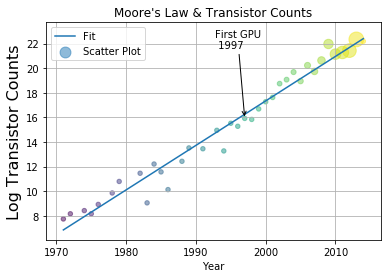

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)
gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)
years = df.index.values
counts = df['trans_count'].values
gpu_counts = df['gpu_trans_count'].values

poly = np.polyfit(years, np.log(counts), deg=1)
plt.plot(years, np.polyval(poly, years), label='Fit')

gpu_start = gpu.index.values.min()
y_ann = np.log(df.at[gpu_start, 'trans_count'])
ann_str = "First GPU\n %d" % gpu_start
plt.annotate(ann_str, xy=(gpu_start, y_ann), arrowprops=dict(arrowstyle="->"), xytext=(-30, +70), textcoords='offset points')

cnt_log = np.log(counts)
plt.scatter(years, cnt_log, c= 200 * years, s=20 + 200 * gpu_counts/gpu_counts.max(), alpha=0.5, label="Scatter Plot")
plt.legend(loc='upper left')
plt.grid()
plt.xlabel("Year")
plt.ylabel("Log Transistor Counts", fontsize=16)
plt.title("Moore's Law & Transistor Counts")
plt.show()

# 3차원 플롯

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


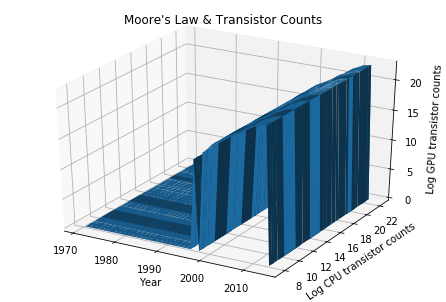

In [11]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)
gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)

fig = plt.figure()
ax = Axes3D(fig)
X = df.index.values

#Y = np.log(df['trans_count'].values)
Y = np.where(df['trans_count'].values>0, np.log(df['trans_count'].values), 0)
X, Y = np.meshgrid(X, Y)
#Z = np.log(df['gpu_trans_count'].values)
Z = np.where(df['gpu_trans_count'].values>0, np.log(df['gpu_trans_count'].values), 0)
Z = Z.reshape(1,Z.shape[0])
ax.plot_surface(X, Y, Z)
ax.set_xlabel('Year')
ax.set_ylabel('Log CPU transistor counts')
ax.set_zlabel('Log GPU transistor counts')
ax.set_title("Moore's Law & Transistor Counts")
plt.show()

# pandas와 플로팅

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, 
right_index=True)
df = df.replace(np.nan, 0)
df.plot()
df.plot(logy=True)
df[df['gpu_trans_count'] > 0].plot(kind='scatter', 
x='trans_count', y='gpu_trans_count', loglog=True)
plt.show()

# 지연 플롯

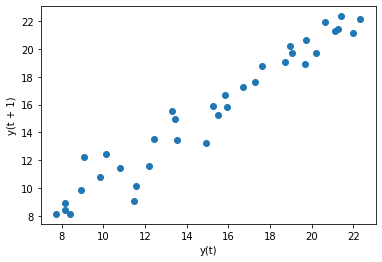

In [8]:
# time series(시계열) 데이터
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)
lag_plot(np.log(df['trans_count']))
plt.show()

# 자기 상관 플롯

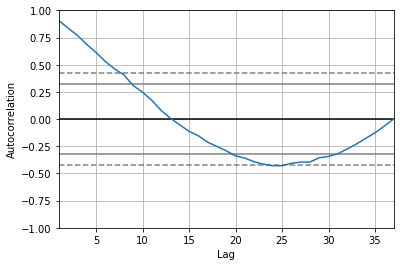

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot

df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)
autocorrelation_plot(np.log(df['trans_count']))
plt.show()
# 지연값이 점점 더 커질수록 상관계수는 0 에 수렴한다
# 지연값이 작은 값이 지연값이 큰 것보다 상관관계가 크다

### Boxplot 
- boxplot을 이용하면 이상치의 값을 정확히 구할 수 있다

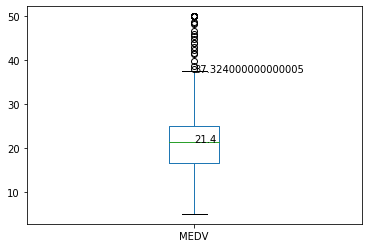

37.324000000000005

In [39]:
df = pd.read_csv('boston_train.csv')
df['MEDV'].plot.box()
plt.text(1,df['MEDV'].median(),df['MEDV'].median())
plt.text(1,df['MEDV'].quantile(0.92),df['MEDV'].quantile(0.92))
plt.show()

df['MEDV'].quantile(0.92)